## Naufal Khairul Rizky
### 5025221127
### Pengolahan Citra dan Visi Komputer

### Tugas 2: Pengolahan Citra pada Domain Frekuensi


# Import Libraries


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# Frequency Domain Filters

## Low Pass Filters

In [2]:
# 2D DFT
def apply_2d_dft(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dft_result = np.fft.fft2(gray_image)
    dft_shifted = np.fft.fftshift(dft_result)
    magnitude_spectrum = np.log(np.abs(dft_shifted))
    return magnitude_spectrum

In [3]:
def apply_ilpf(image, D0):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform 2D DFT
    dft = np.fft.fft2(gray_image)
    dft_shifted = np.fft.fftshift(dft)

    # Create and apply Ideal Low Pass Filter (ILPF)
    rows, cols = dft_shifted.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)

    # Apply mask centered at (crow, ccol) with radius D0
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) <= D0:
                mask[i, j] = 1

    # Apply mask on shifted DFT
    filtered_dft = dft_shifted * mask

    # Perform inverse DFT
    idft_shifted = np.fft.ifftshift(filtered_dft)
    inverse_dft = np.fft.ifft2(idft_shifted)
    filtered_image = np.abs(inverse_dft)

    return filtered_image

In [4]:
def apply_blpf(image, D0, n=4):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform 2D DFT
    dft = np.fft.fft2(gray_image)
    dft_shifted = np.fft.fftshift(dft)

    # Create Butterworth Low Pass Filter (BLPF)
    rows, cols = dft_shifted.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    # Create Butterworth filter mask
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (D / D0) ** (2 * n))

    # Apply mask on shifted DFT
    filtered_dft = dft_shifted * mask

    # Perform inverse DFT
    idft_shifted = np.fft.ifftshift(filtered_dft)
    inverse_dft = np.fft.ifft2(idft_shifted)
    filtered_image = np.abs(inverse_dft)

    return filtered_image

In [5]:
def apply_glpf(image, D0):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform 2D DFT
    dft = np.fft.fft2(gray_image)
    dft_shifted = np.fft.fftshift(dft)

    # Create and apply Gaussian Low Pass Filter (GLPF)
    rows, cols = dft_shifted.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    # Apply Gaussian mask
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - crow)**2 + (j - ccol)**2)
            mask[i, j] = np.exp(-(D**2) / (2 * (D0**2)))

    # Apply mask on shifted DFT
    filtered_dft = dft_shifted * mask

    # Step 4: Perform inverse DFT
    idft_shifted = np.fft.ifftshift(filtered_dft)
    inverse_dft = np.fft.ifft2(idft_shifted)
    filtered_image = np.abs(inverse_dft)

    return filtered_image

## High Pass Filters

In [6]:
def apply_ihpf(image, D0):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform 2D DFT
    dft = np.fft.fft2(gray_image)
    dft_shifted = np.fft.fftshift(dft)

    # Create and apply Ideal High Pass Filter (IHPF)
    rows, cols = dft_shifted.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)  # Start with all ones (high pass)

    # Apply mask centered at (crow, ccol) with radius D0
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) <= D0:
                mask[i, j] = 0  # Set to zero for frequencies inside the circle (low pass)

    # Apply mask on shifted DFT
    filtered_dft = dft_shifted * mask

    # Perform inverse DFT
    idft_shifted = np.fft.ifftshift(filtered_dft)
    inverse_dft = np.fft.ifft2(idft_shifted)
    filtered_image = np.abs(inverse_dft)

    return filtered_image


In [7]:
def apply_bhpf(image, D0, n=4):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform 2D DFT
    dft = np.fft.fft2(gray_image)
    dft_shifted = np.fft.fftshift(dft)

    # Create and apply Butterworth High Pass Filter (BHPF)
    rows, cols = dft_shifted.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    # Create the Butterworth filter mask
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - crow)**2 + (j - ccol)**2)
            mask[i, j] = 1 / (1 + (D0 / D)**(2 * n)) if D != 0 else 0

    # Apply mask on shifted DFT
    filtered_dft = dft_shifted * mask

    # Perform inverse DFT
    idft_shifted = np.fft.ifftshift(filtered_dft)
    inverse_dft = np.fft.ifft2(idft_shifted)
    filtered_image = np.abs(inverse_dft)

    return filtered_image

In [8]:
def apply_ghpf(image, D0):
    # Step 1: Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Perform 2D DFT
    dft = np.fft.fft2(gray_image)
    dft_shifted = np.fft.fftshift(dft)

    # Step 3: Create and apply Ideal Gaussian High Pass Filter (GHPF)
    rows, cols = dft_shifted.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)  # Start with all zeros (low pass)

    # Generate the Gaussian high pass filter
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - crow)**2 + (j - ccol)**2)
            mask[i, j] = 1 - np.exp(-((D**2) / (2 * (D0**2))))  # GHPF formula

    # Apply mask on shifted DFT
    filtered_dft = dft_shifted * mask

    # Step 4: Perform inverse DFT
    idft_shifted = np.fft.ifftshift(filtered_dft)
    inverse_dft = np.fft.ifft2(idft_shifted)
    filtered_image = np.abs(inverse_dft)

    return filtered_image

## Homomorphic Filter

In [9]:
def apply_homomorphic_filter(image, D0, n, gammaL, gammaH):

    # Step 1: Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Step 2: Convert image to float and take the logarithm
    gray_image = gray_image.astype(np.float32) / 255.0
    log_image = np.log1p(gray_image)  # log(1 + image)

    # Step 3: Perform 2D DFT on the log-transformed image
    dft = np.fft.fft2(log_image)
    dft_shifted = np.fft.fftshift(dft)

    # Step 4: Create the Butterworth high-pass filter (BHPF)
    rows, cols = dft_shifted.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    # Generate the Butterworth high-pass filter
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            if D != 0:  # Avoid division by zero at the center
                mask[i, j] = (gammaH - gammaL) * (1 - 1 / (1 + (D0 / D) ** (2 * n))) + gammaL
            else:
                mask[i, j] = 0

    # Step 5: Apply the mask to the DFT of the image
    filtered_dft = dft_shifted * mask

    # Step 6: Perform inverse DFT
    idft_shifted = np.fft.ifftshift(filtered_dft)
    inverse_dft = np.fft.ifft2(idft_shifted)
    filtered_image = np.abs(inverse_dft)

    # Step 7: Exponentiate the result to reverse the logarithmic transform
    exp_image = np.expm1(filtered_image)

    # Step 8: Normalize the result to range [0, 1]
    filtered_image_normalized = np.clip(exp_image, 0, 1)

    return filtered_image_normalized


# Image Loader and Display

In [10]:
# Function to load image from local path
def load_image_from_path(path):
    img = cv2.imread(path)
    return img

In [11]:
# Function to display images
def display_image(original, processed, title1="Original", title2="Processed"):
    plt.figure(figsize=(10,5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    # Processed image
    plt.subplot(1, 2, 2)
    if len(processed.shape) == 2:  # Grayscale images
        plt.imshow(processed, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()

In [12]:
def compute_dft(image):
    """Compute the 2D DFT of an image and shift the zero frequency component to the center."""
    dft = np.fft.fft2(image)
    dft_shifted = np.fft.fftshift(dft)
    return dft_shifted

def magnitude_spectrum(dft_shifted):
    """Compute the magnitude spectrum of the DFT."""
    magnitude = np.abs(dft_shifted)
    # Use logarithm for better visualization
    magnitude = np.log(magnitude + 1)
    return magnitude

# Function to apply filter and display results along with 2D DFT
def apply_filter_and_display(image, filter_type, radii_values, filter_order=2):
    filtered_images = []
    dft_images = []

    # Apply filter for each radius value and save the results
    for D0 in radii_values:
        if filter_type == 'ILPF':
            filtered_image = apply_ilpf(image, D0)
        elif filter_type == 'GLPF':
            filtered_image = apply_glpf(image, D0)
        elif filter_type == 'BLPF':
            filtered_image = apply_blpf(image, D0)
        elif filter_type == 'IHPF':
            filtered_image = apply_ihpf(image, D0)
        elif filter_type == 'BHPF':
            filtered_image = apply_bhpf(image, D0)
        elif filter_type == 'GHPF':
            filtered_image = apply_bhpf(image, D0)
        filtered_images.append(filtered_image)

        # Compute 2D DFT of the filtered image
        dft_image = compute_dft(filtered_image)
        dft_images.append(magnitude_spectrum(dft_image))

    # Display all images and their DFTs
    plt.figure(figsize=(20, 12))

    # Original image
    plt.subplot(2, len(radii_values) + 1, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    # Filtered images for each D0
    for idx, D0 in enumerate(radii_values):
        plt.subplot(2, len(radii_values) + 1, idx + 2)
        plt.imshow(filtered_images[idx], cmap='gray')
        plt.title(f"{filter_type} (D0={D0})")
        plt.axis('off')

        # DFT magnitude spectrum for the filtered image
        plt.subplot(2, len(radii_values) + 1, len(radii_values) + idx + 2)
        plt.imshow(dft_images[idx], cmap='gray')
        plt.title(f"{filter_type} DFT (D0={D0})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()



# Testing


## Low Pass Filter Test


In [13]:

# Load gambar dari path
path = '/content/download (1).png'
image = load_image_from_path(path)

<Figure size 1000x500 with 0 Axes>

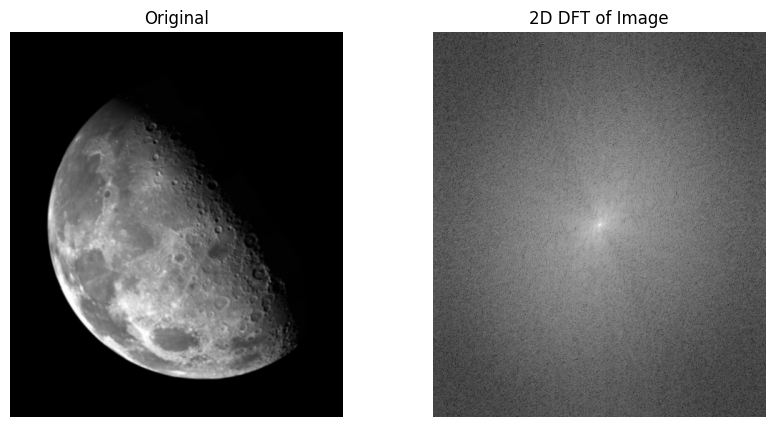

In [14]:
# 2D DFT
dft_2d_image = apply_2d_dft(image)
plt.figure(figsize=(10,5))
display_image(image, dft_2d_image, title2="2D DFT of Image")

In [15]:
radii_values = [5, 15, 30, 80, 230]

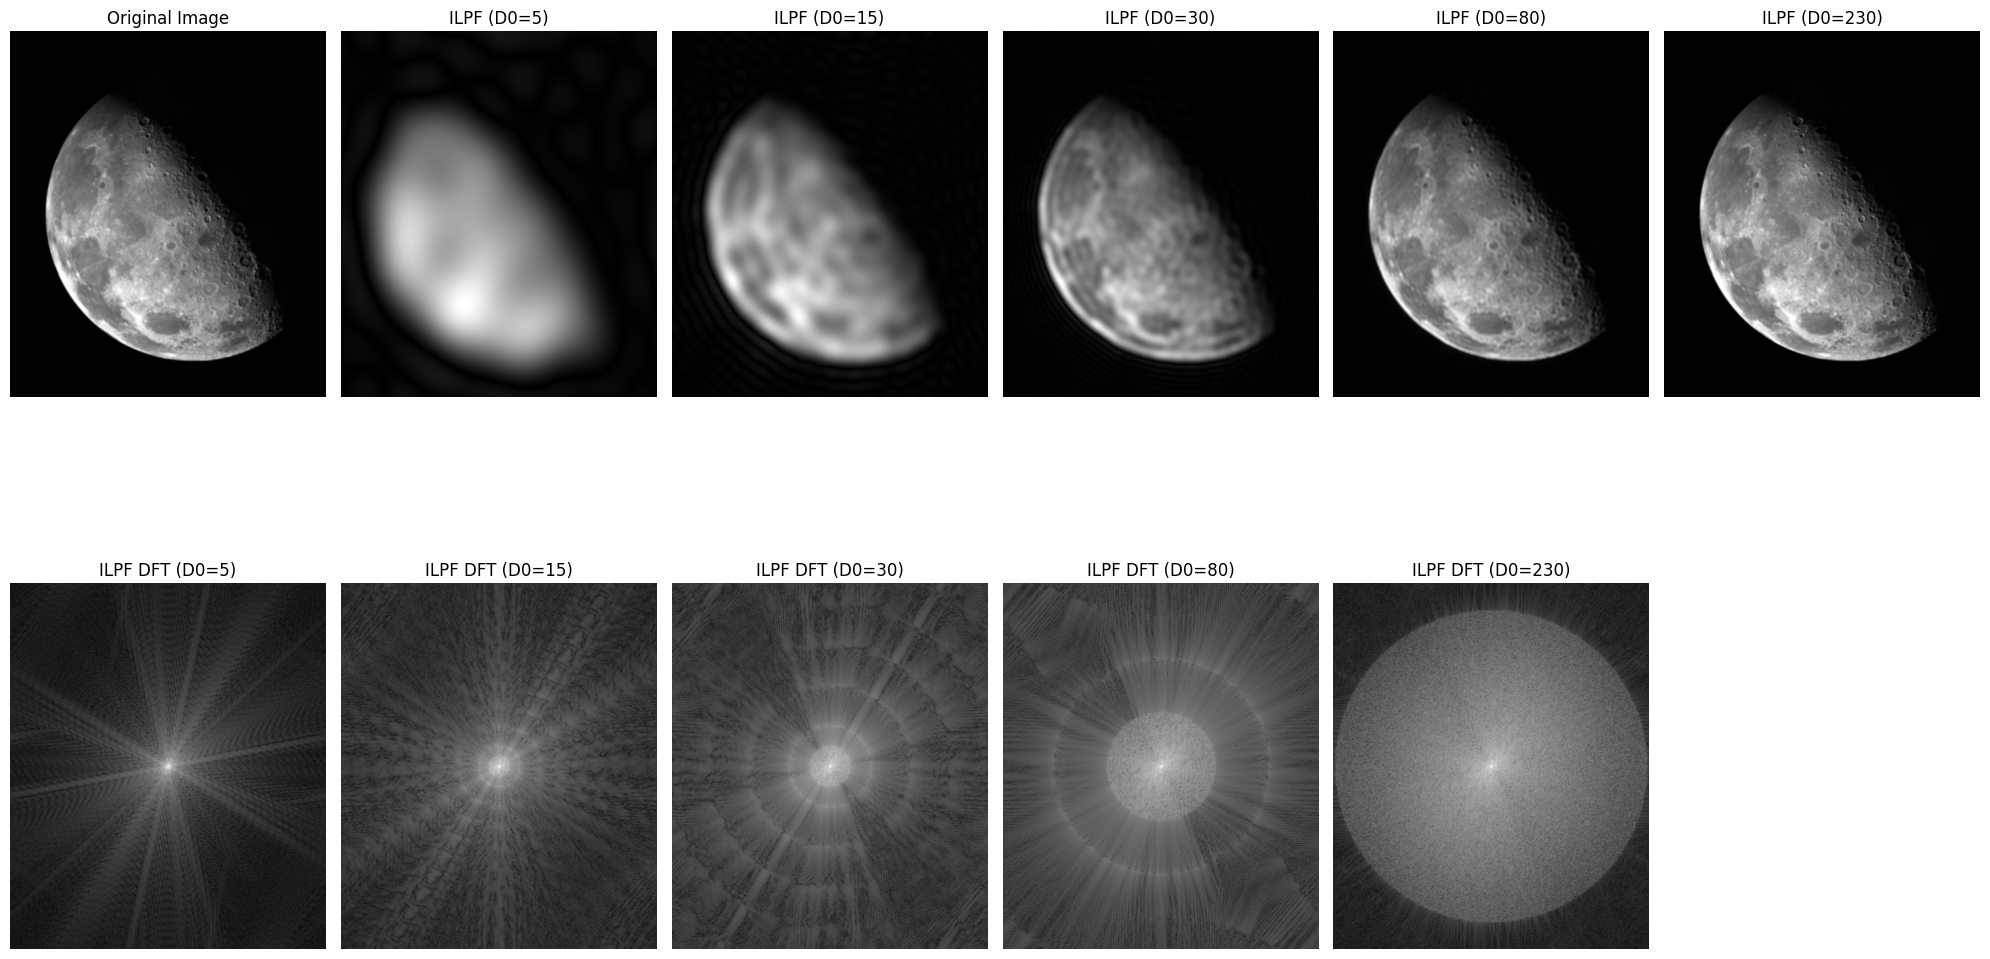

In [16]:
# ILPF
apply_filter_and_display(image, 'ILPF', radii_values)

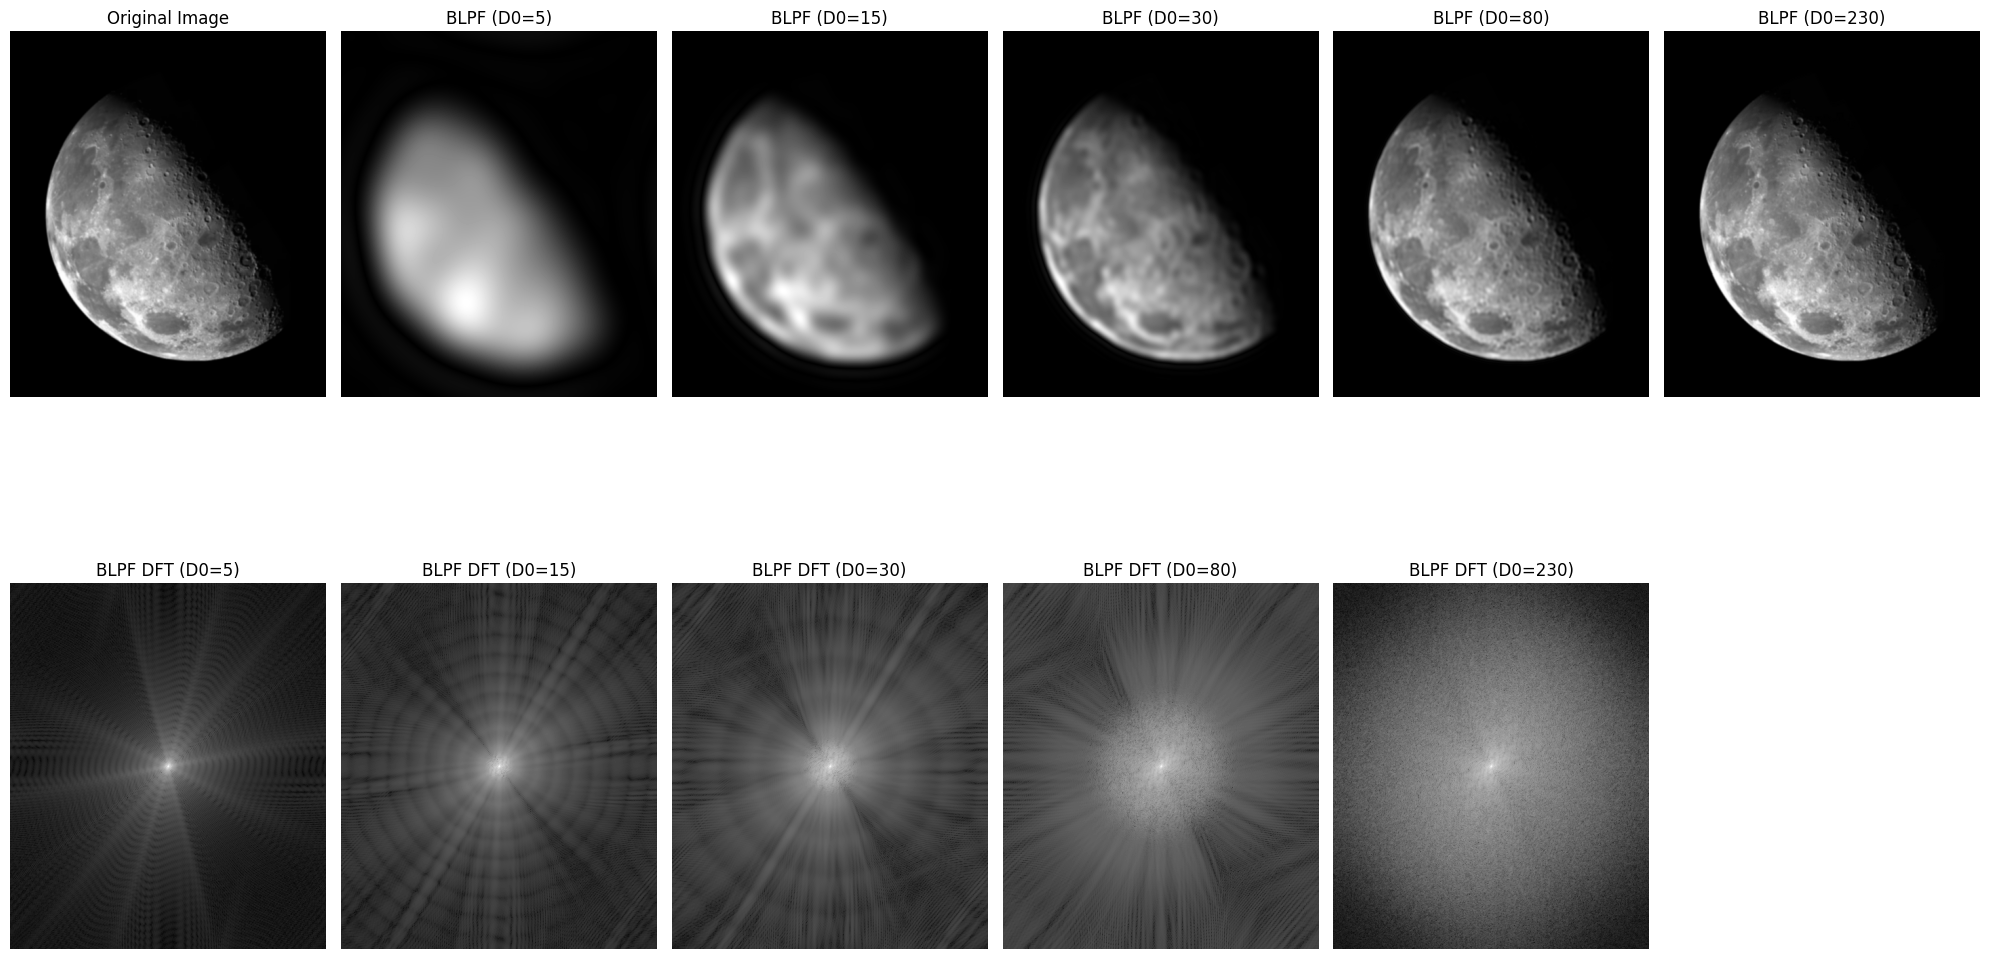

In [17]:
# BLPF
apply_filter_and_display(image, 'BLPF', radii_values)

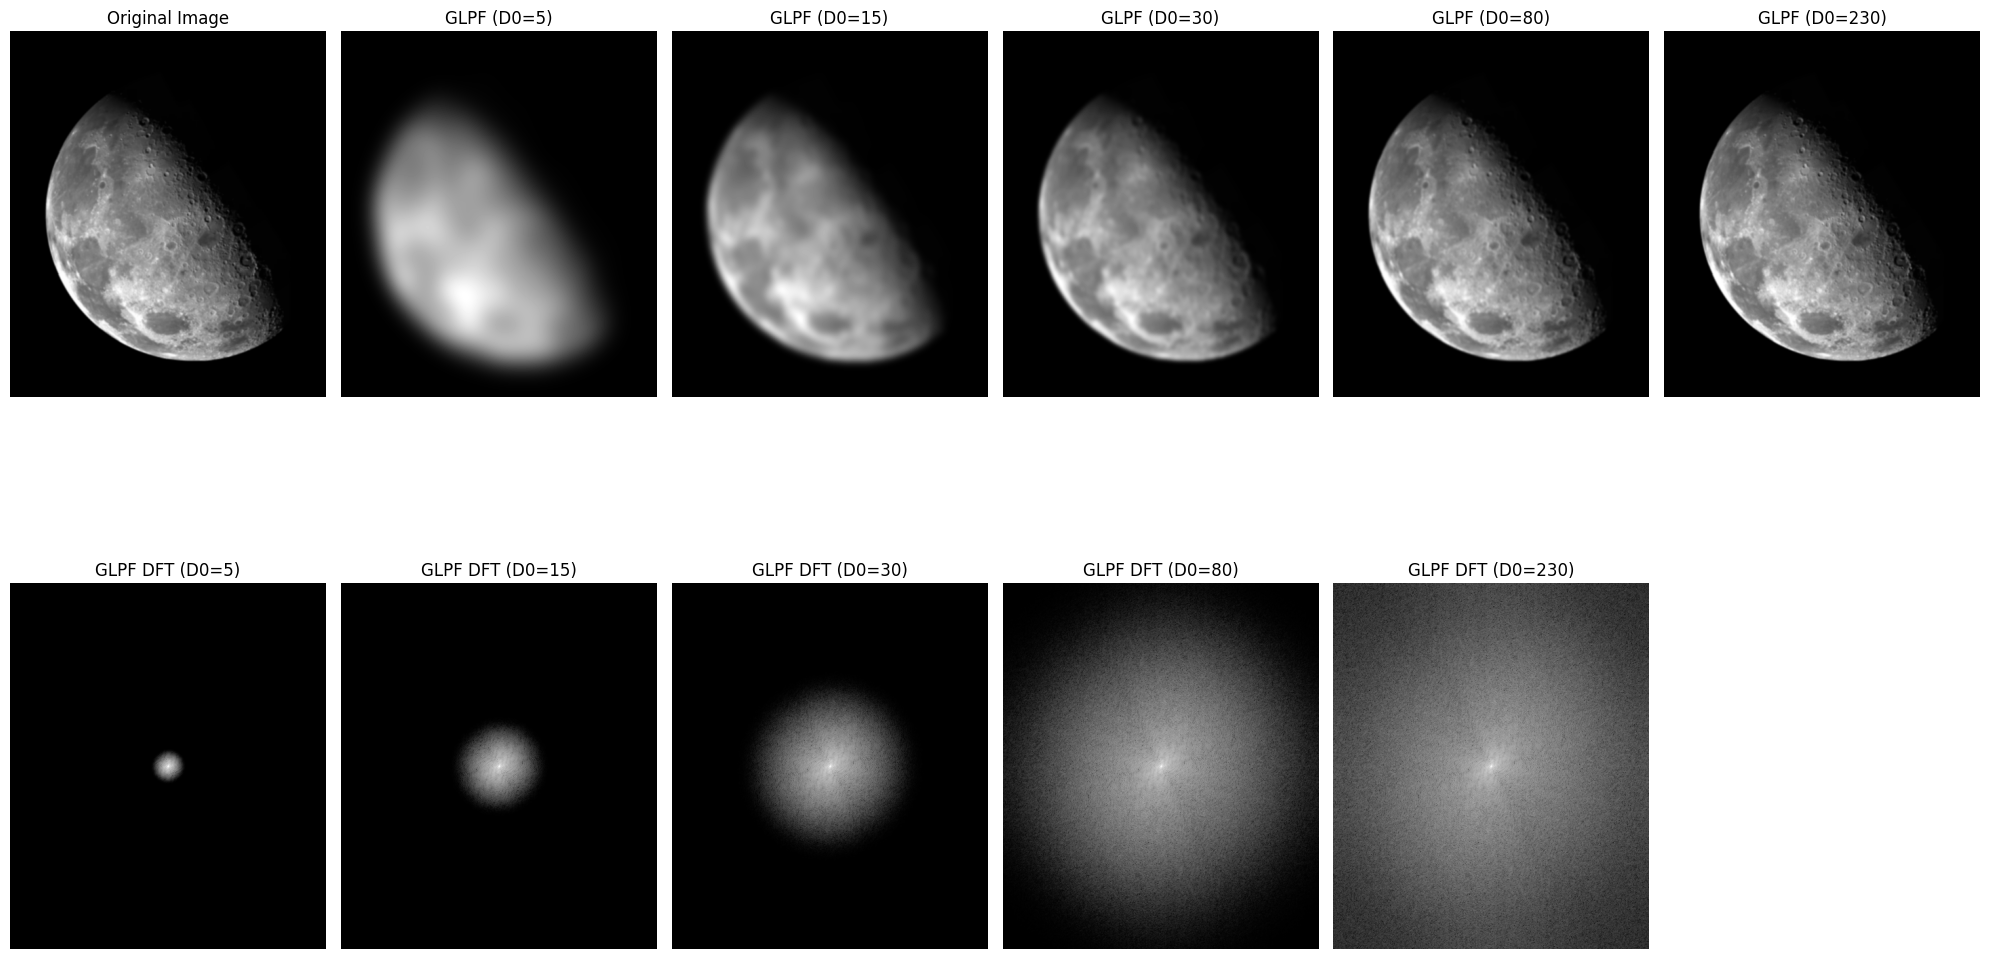

In [18]:
# GLPF
apply_filter_and_display(image, 'GLPF', radii_values)

## High Pass Filter Test

In [19]:
# Load gambar dari path
path = '/content/z0BYTaO4-modified.png'
image = load_image_from_path(path)

<Figure size 1000x500 with 0 Axes>

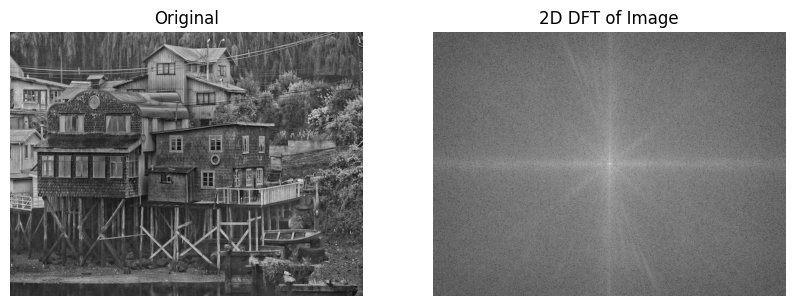

In [20]:
# 2D DFT
dft_2d_image = apply_2d_dft(image)
plt.figure(figsize=(10,5))
display_image(image, dft_2d_image, title2="2D DFT of Image")

In [21]:
radii_values = [15, 30, 80]

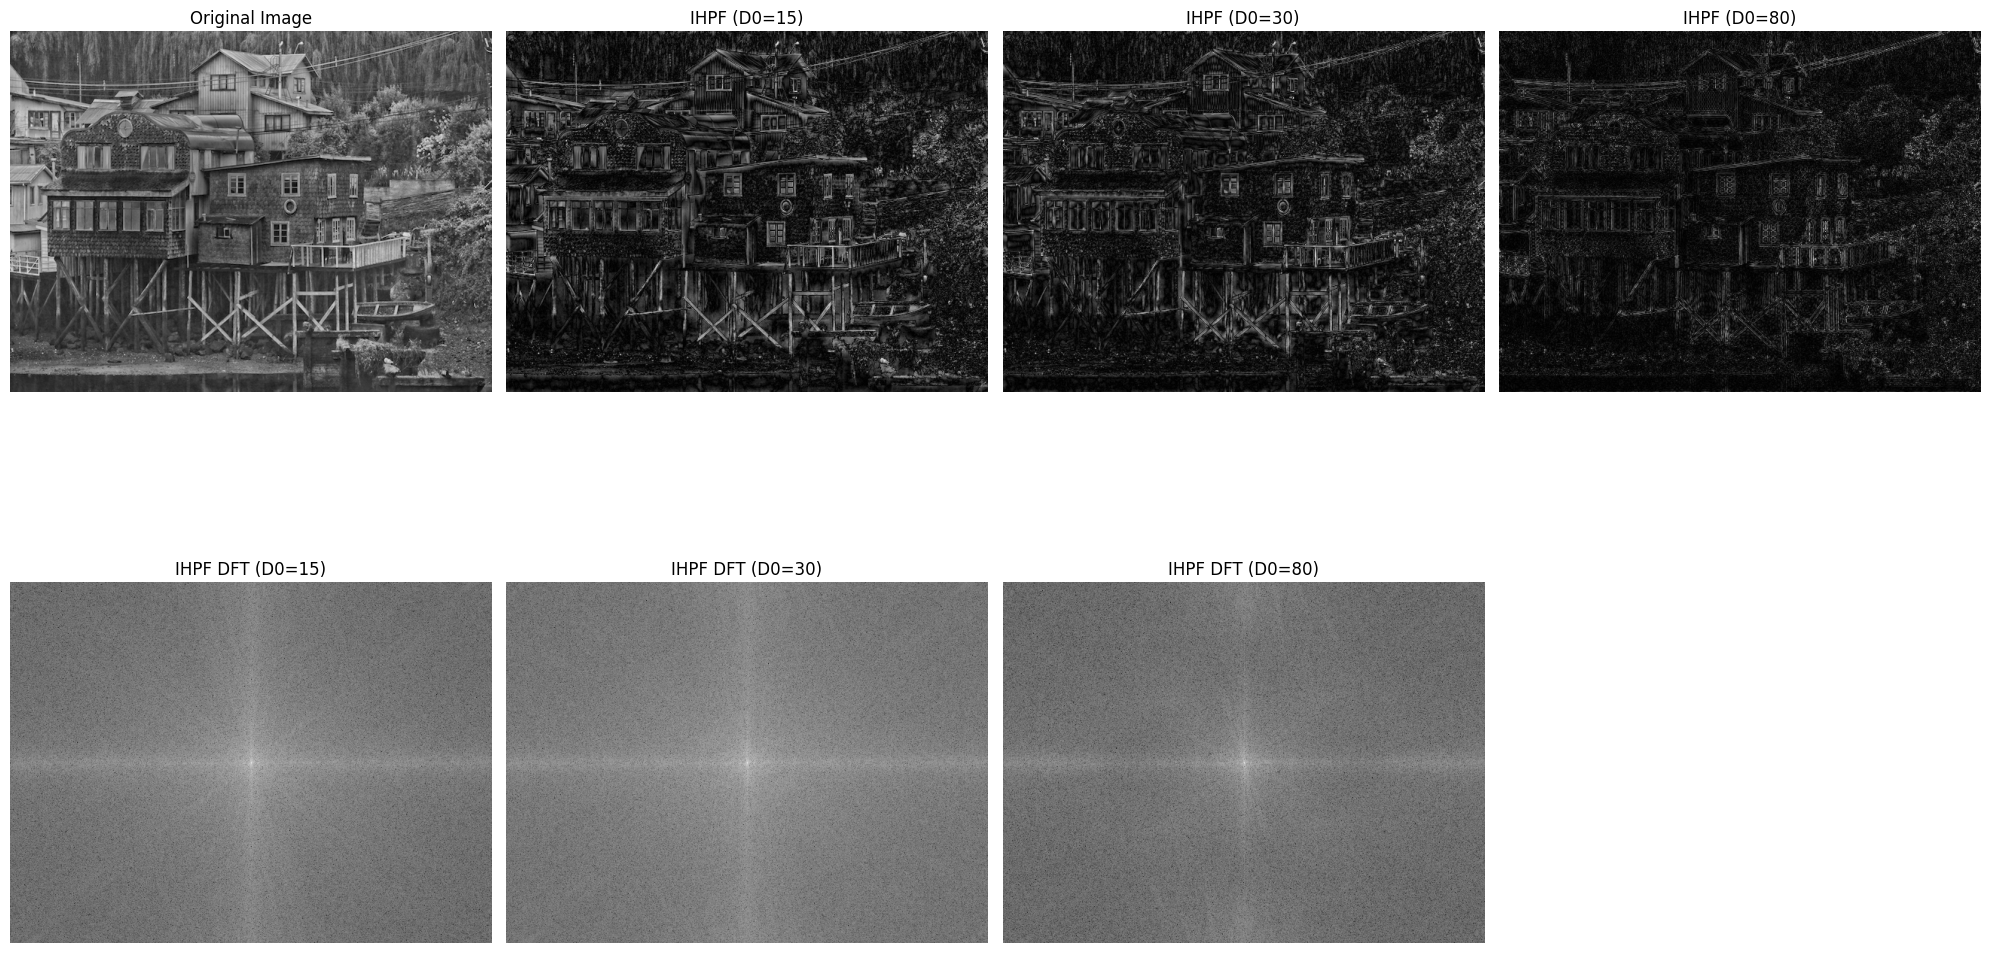

In [22]:
# IHPF
apply_filter_and_display(image, 'IHPF', radii_values)

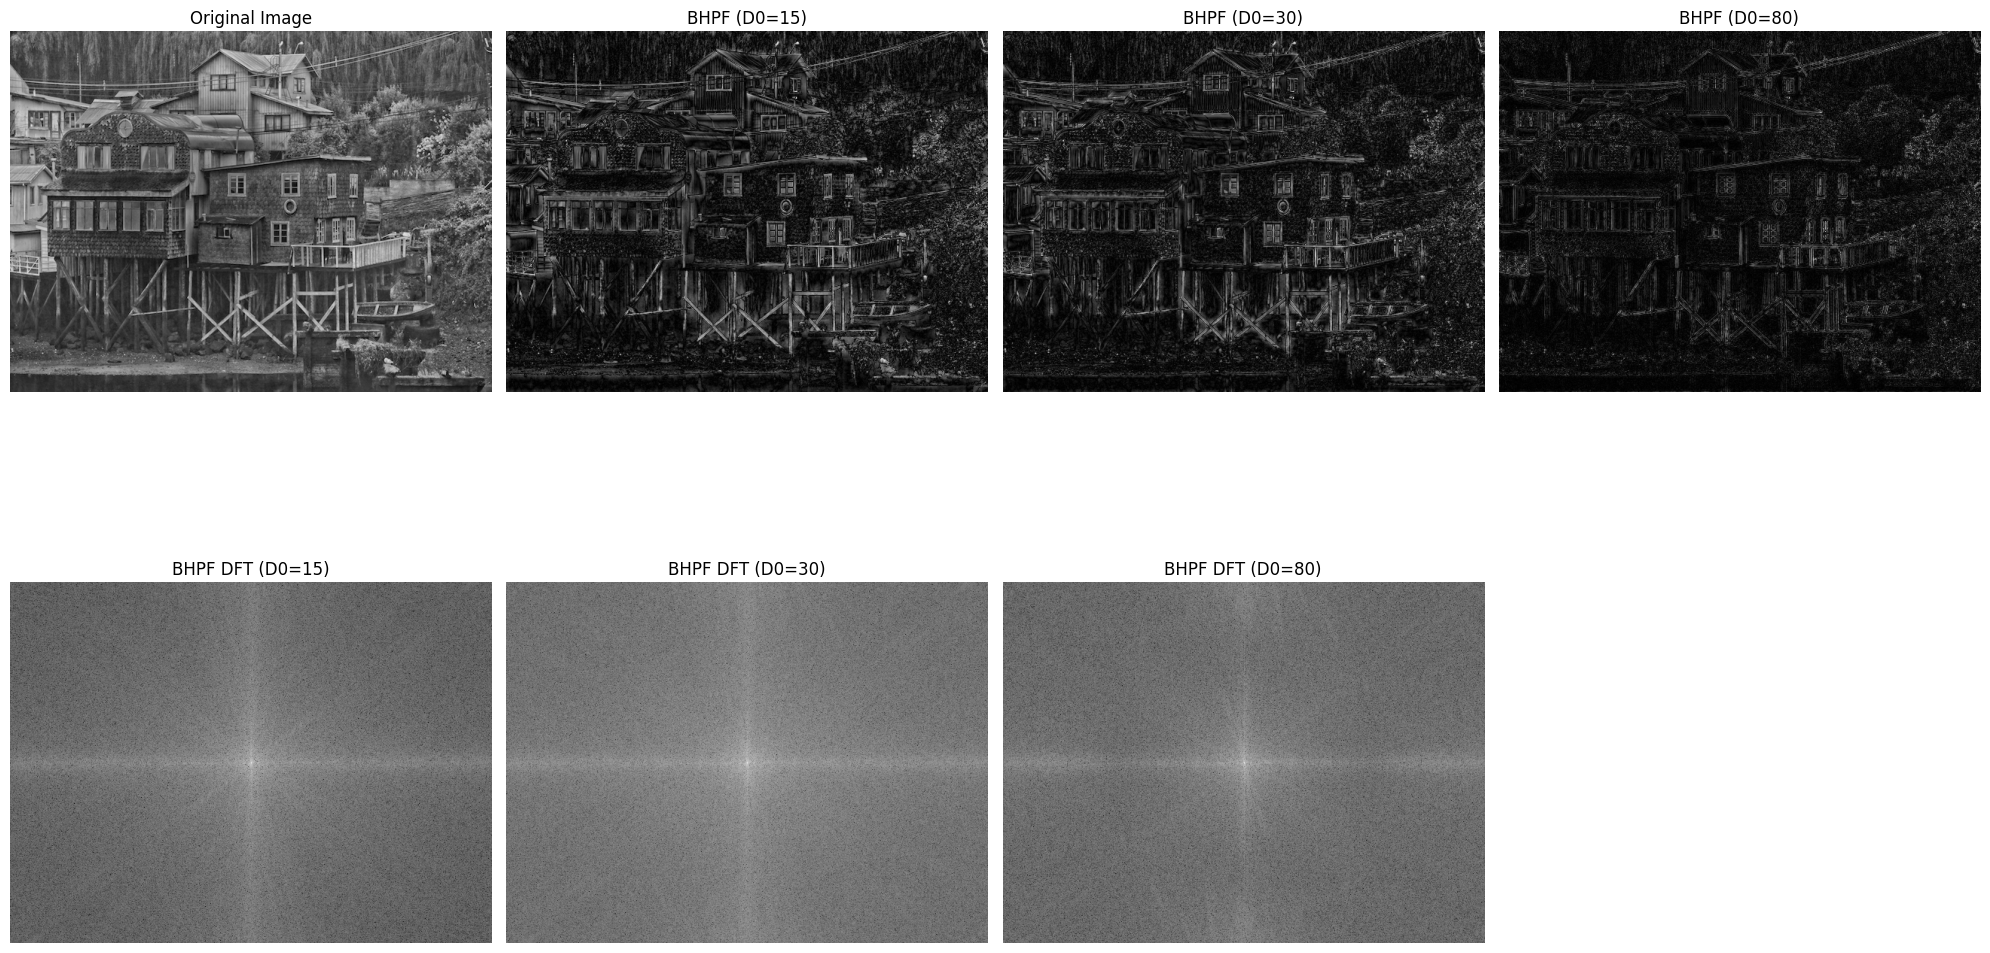

In [23]:
# BHPF
apply_filter_and_display(image, 'BHPF', radii_values)

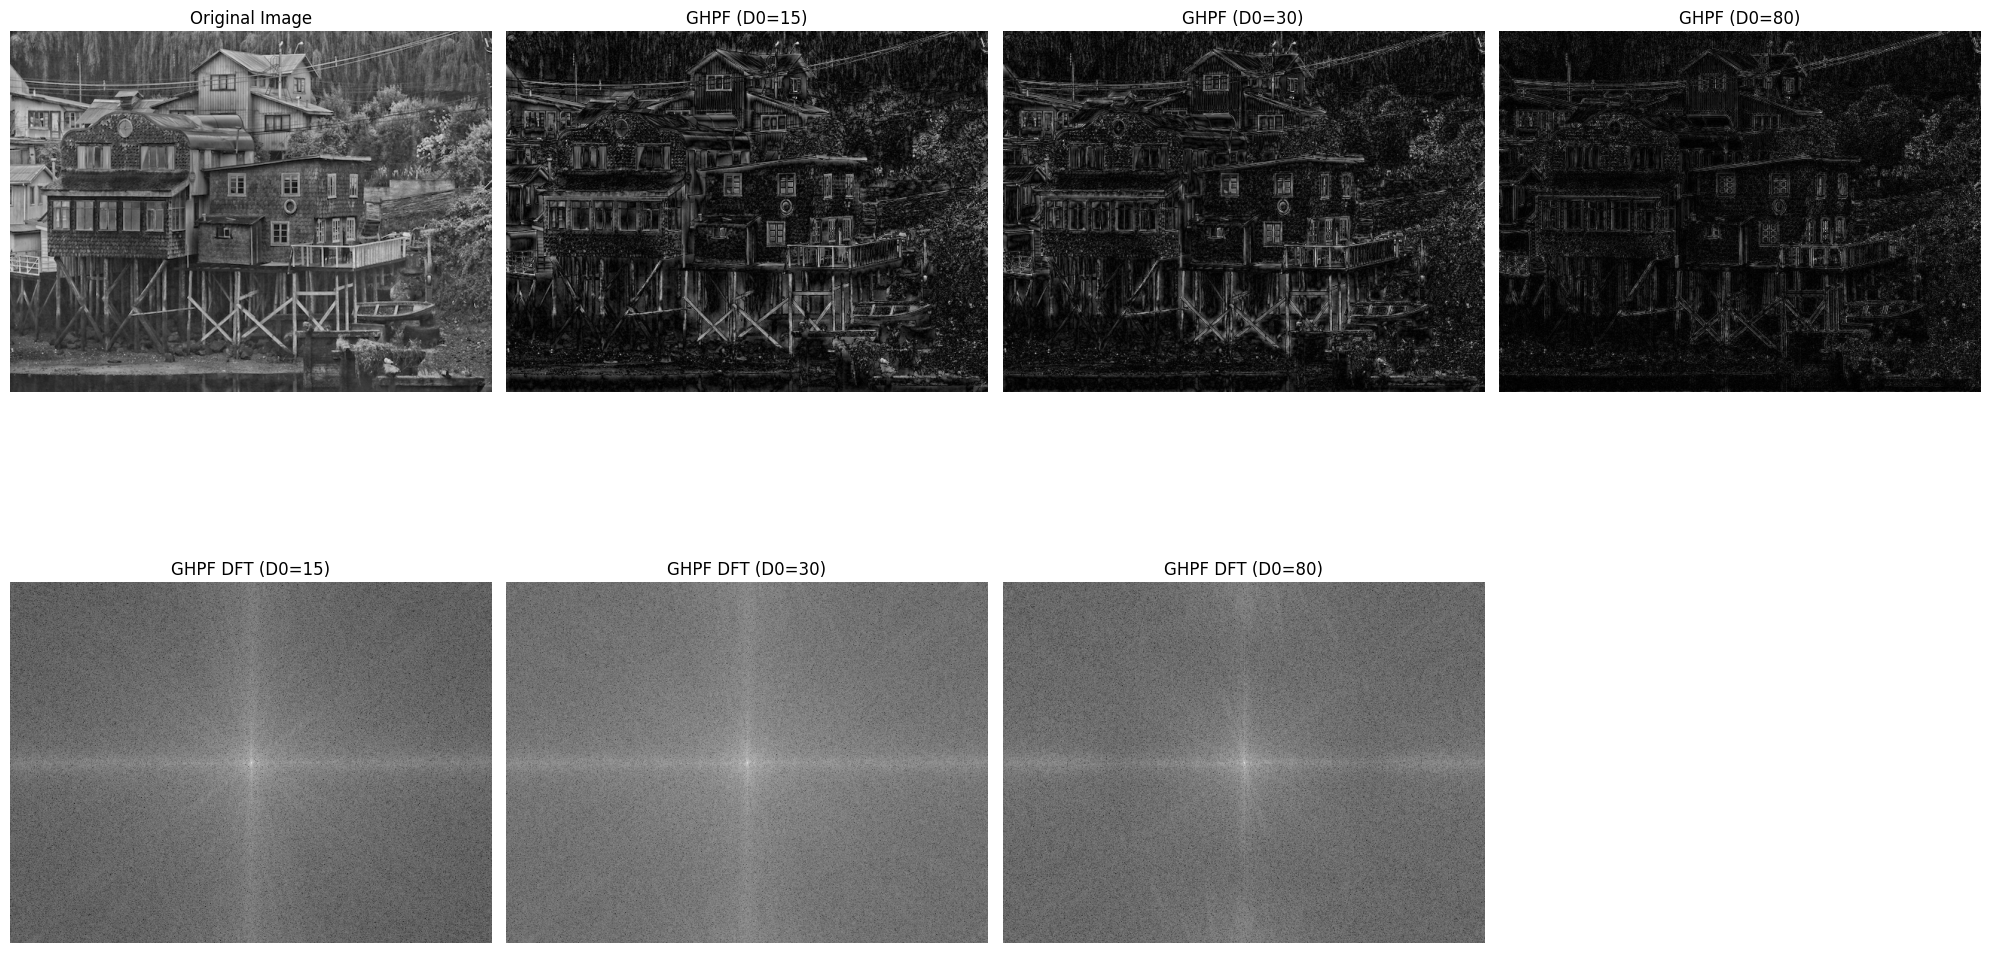

In [24]:
# GHPF
apply_filter_and_display(image, 'GHPF', radii_values)

## Homomorphic

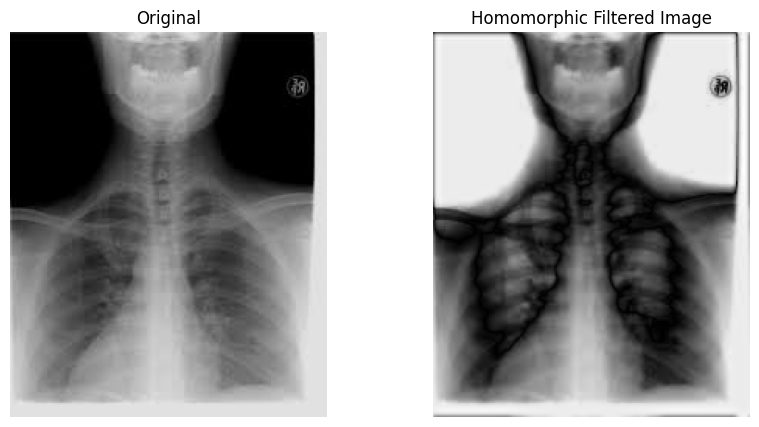

In [25]:
# Load an example image
image = cv2.imread('/content/aad.jpeg')

# Apply homomorphic filter
D0 = 30
homomorphic_filtered_image = apply_homomorphic_filter(image, D0, 2, 0.5, 1.0)

# Display original and filtered images
display_image(image, homomorphic_filtered_image, title2="Homomorphic Filtered Image")